<a href="https://colab.research.google.com/github/eseo5325/BostonCrime/blob/main/BostonCrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datascience

In [ ]:
from datascience import *
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/BostonCrime.csv'

Mounted at /content/drive


In [ ]:
BostonCrime_df = pd.read_csv(path, encoding = "latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
BostonCrime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

In [ ]:
Offense_Codes = BostonCrime_df[['OFFENSE_CODE']].value_counts().head(15)
Offense_Codes

OFFENSE_CODE
3006            19360
3115            19180
3831            16730
1402            15542
802             15199
3301            13478
3410            11632
3114            11443
2647             9346
617              9298
3201             9174
614              9119
3125             8579
613              8166
3802             6759
dtype: int64

In [ ]:
BostonCrime_df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [ ]:
BostonCrime_df.groupby(['OFFENSE_CODE_GROUP','YEAR']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

,OFFENSE_CODE_GROUP,YEAR,count
159,Motor Vehicle Accident Response,2017,12049
158,Motor Vehicle Accident Response,2016,11534
160,Motor Vehicle Accident Response,2018,8724
124,Larceny,2016,7903
147,Medical Assistance,2017,7817
...,...,...,...
108,INVESTIGATE PERSON,2015,1
33,Burglary - No Property Taken,2015,1
95,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,2017,1
34,Burglary - No Property Taken,2016,1


In [ ]:
BostonCrime_df.head(15)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,10/3/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,8/30/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,10/3/2018 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,10/3/2018 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,10/3/2018 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,10/2/2018 20:40,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,10/3/2018 20:16,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,10/3/2018 19:32,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,10/3/2018 19:27,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,10/3/2018 20:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [ ]:
BostonCrime_df.tail(15)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
327805,I100033064-00,2910,Violations,VAL - OPERATING AFTER REV/SUSP.,B2,304,NaN,7/29/2016 18:20,2016,7,Friday,18,Part Two,SLAYTON WAY,42.321770,-71.097798,"(42.32177032, -71.09779774)"
327806,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2/1/2016 1:43,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"
327807,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2/1/2016 1:43,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"
327808,I090317057-00,403,Aggravated Assault,ASSAULT & BATTERY D/W - OTHER,B3,458,NaN,11/20/2015 11:15,2015,11,Friday,11,Part One,BLUE HILL AVE,42.301897,-71.085549,"(42.30189690, -71.08554944)"
327809,I090317057-00,3125,Warrant Arrests,WARRANT ARREST,B3,458,NaN,11/20/2015 11:15,2015,11,Friday,11,Part Three,BLUE HILL AVE,42.301897,-71.085549,"(42.30189690, -71.08554944)"
327810,I080542626-00,3125,Warrant Arrests,WARRANT ARREST,A1,111,NaN,8/12/2015 12:00,2015,8,Wednesday,12,Part Three,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
327811,I080542626-00,1848,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,111,NaN,8/12/2015 12:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
327812,I080542626-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",A1,111,NaN,8/12/2015 12:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
327813,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,1/27/2018 14:01,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
327814,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,1/27/2018 14:01,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"


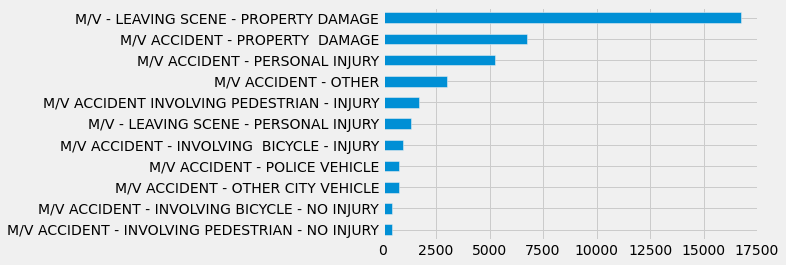

In [ ]:
BostonCrime_df['OFFENSE_DESCRIPTION'][BostonCrime_df['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response'].value_counts().sort_values().plot.barh()